## Goal

We generate censored 2-D data for testing different STAN models.

Steps:
1. Generate (x,y) data from a 2-D normal distribution
2. Censor the data along the y-axis
3. Save the original and the censored data to files
4. Plot scatter plots with empirical covariance ellipse

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

import sys
sys.path.append('../')
from utils.plot_utilities import add_margin, equalize_xy, plot_gaussian_contour

### 1. Generate 2-D normal data

In [2]:
# True distribution parameter values

mu = np.array([0, 0])
Sigma = np.array([
    [2, 0.5],
    [0.5, 1]
])

In [3]:
# Original data

N = 200
data_orig = np.random.multivariate_normal(mean=mu, cov=Sigma, size=N)

### 2. Censor y data

In [4]:
def censor(y, ylow, yhigh):
    if ylow < y < yhigh:
        return y
    if y <= ylow:
        return ylow
    if yhigh <= y:
        return yhigh

In [5]:
# censoring boundaries

ylow = -2
yhigh = 0.5

In [6]:
# Create censored data

data_censored = data_orig.copy()
for idx in range(data_orig.shape[0]):
    data_censored[idx, 1] = censor(data_orig[idx, 1], ylow, yhigh)

### 3. Save both data to files

In [7]:
data_directory = '../data/'

# save original data
np.save(os.path.join(data_directory, 'original_data.npy'), data_orig)

# save truncated data
np.save(os.path.join(data_directory, 'censored_data.npy'), data_censored)

In [8]:
# calculate empirical meand and covariance of original and censored data

mu_orig = np.mean(data_orig, axis=0)
Sigma_orig = np.cov(data_orig.T)

mu_censored = np.mean(data_censored, axis=0)
Sigma_censored = np.cov(data_censored.T)

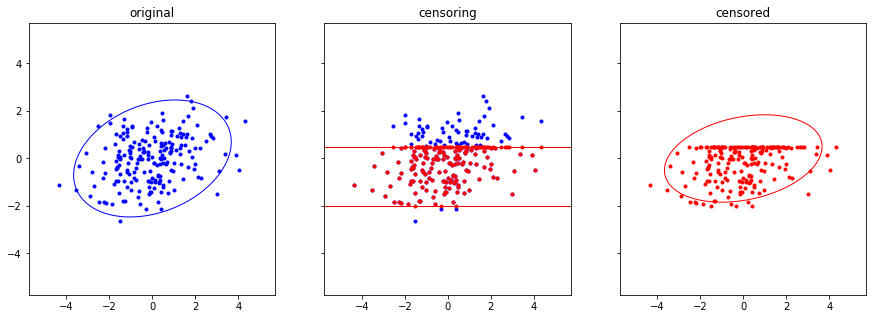

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)

ax = axes[0]
ax.plot(data_orig[:,0], data_orig[:,1], 'b.')
equalize_xy(ax)
add_margin(ax, single_margin_ratio=0.1)
plot_gaussian_contour(ax, mu_orig, Sigma_orig, color='b')
ax.set_title('original')

ax = axes[1]
ax.plot(data_orig[:,0], data_orig[:,1], 'b.')
ax.plot(data_censored[:,0], data_censored[:,1], 'r.')
ax.axhline(y=ylow, color='r', lw=1)
ax.axhline(y=yhigh, color='r', lw=1)
ax.set_title('censoring')

ax = axes[2]
ax.plot(data_censored[:,0], data_censored[:,1], 'r.')
plot_gaussian_contour(ax, mu_censored, Sigma_censored, color='r')
# plot_gaussian_contour(ax, mu_orig, Sigma_orig, linestyle='--', color='b')
ax.set_title('censored')


plt.show()